In [2]:
"""
CAMP 2022 tutorial 5 neuron oscillation

"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
from scipy.integrate import solve_ivp
import math as math



In [3]:
#variables
n = 5
endtr = 100e3 #100 sec long simulation
clipt = -55*1e3
thr = 0
ghc = 0.005
gel=0.5 #nS
gsynA=5

N0 = np.empty(n) 
N0.fill(0)
H0 = np.empty(n)
H0.fill(0)
Vm0 = np.empty(n)
Vm0.fill(-65)
print( f'N0 ={N0}, H0 = {H0}, Vm0 = {Vm0}')
t_span = (0,endtr) #not sure about the syntax
dt=np.arange(0,endtr,0.211)
print(f't_span = {t_span}')
y0 = np.concatenate((N0,H0,Vm0))
print(f'y0 = {y0}')

N0 =[0. 0. 0. 0. 0.], H0 = [0. 0. 0. 0. 0.], Vm0 = [-65. -65. -65. -65. -65.]
t_span = (0, 100000.0)
y0 = [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. -65. -65. -65. -65.
 -65.]


In [4]:
def switchIC(t,y,ghc=ghc,gsynicpd=gsynA,gsynicin=gsynA,geliclp=gel,geliclg=gel):
    ny= np.shape(y)[0]
    N = y[0:5]
    H = y[5:10]
    Vm = y[10:15]
    #print(f'vm = {np.shape(Vm)}, H = {np.shape(H)}, N = {np.shape(N)},' 
    #      f'ny= {ny}')
    gsyn_lp_pd =ghc
    gsyn_lg_in = ghc
    gsyn_ic_pd = gsynicpd
    gsyn_ic_in = gsynicin
    gel_ic_lp = geliclp
    gel_ic_lg = geliclg 
    """
first to last index of each array corresponds to f1, f2, hn, s2, s1,
respectively.
    """
    gk = np.array([0.039,0.039,0.019,0.015,0.015])
    gl = np.empty(5)
    gl.fill(0.0001)
    gc = np.array([0.019,0.019,0.017,0.0085,0.0085])
    gh = np.array([0.025,0.025,0.008,0.01,0.01])
    #print(f'gk = {gk}, shape gk = {np.shape(gk)}')
    #print(f'gl = {gl}, shape gl = {np.shape(gl)}')
    #print(f'gc = {gc}, shape gc = {np.shape(gc)}')
    #print(f'gh = {gh}, shape gh = {np.shape(gh)}')
    #n=5
    iext =np.zeros(5)
    #print(f'iext = {iext}, shape iext ={np.shape(iext)}')
    #Vm=np.array([1, 2, 3, 4,5])
    c=1 #nF
    phi=0.002 #1/ms
    vk=-80 #mV
    vl=-40
    vca=100
    vh=-20
    vsyn=-75
    vp1=0
    vp2=20
    vp3=0
    vp4=15
    vp5=78.3
    vp6=10.5
    vp7=-42.2
    vp8=87.3
    vth=-25
    vp11=5

    minf=0.5*(1+np.tanh((Vm-vp1)/vp2))
    ninf=0.5*(1+np.tanh((Vm-vp3)/vp4))
    lamdn= phi*(np.cosh((Vm-vp3)/(2*vp4)))
    hinf=1/(1+np.exp((Vm+vp5)/vp6))
    tauh=(272-((-1499)/(1+np.exp((-Vm+vp7)/vp8))))
    #syn from cell onto others
    sinf=1/(1+np.exp((vth-Vm)/vp11))
    #print (f'minf = {minf} shape- {np.shape(minf)}')
    #print(f'ninf = {ninf} shape - {np.shape(ninf)}')
    #print(f'lambn ={lamdn} shape- {np.shape(lamdn)}')
    #print(f'hinf = {hinf} shape - {np.shape(hinf)}')
    #print(f' tauh = {tauh} shape - {np.shape(tauh)}')
    #print(f'sinf = {sinf} shape- {np.shape(sinf)}')
    ielec = np.array([0, gel_ic_lp*(Vm[1]-Vm[2]),
             (gel_ic_lp*(Vm[2]-Vm[1]))+(gel_ic_lg*(Vm[2]-Vm[3])),
             gel_ic_lg*(Vm[3]-Vm[2]),0])
    #print(f'ielec ={ielec}')
    isyn = np.array([(gsyn_lp_pd*sinf[1]*(Vm[0]-vsyn)),(gsyn_lp_pd*sinf[0]*(Vm[1]-vsyn)),
             (gsyn_ic_pd*sinf[0]*(Vm[2]-vsyn))+(gsyn_ic_in*sinf[4]*(Vm[2]-vsyn)),
            (gsyn_lg_in*sinf[4]*(Vm[3]-vsyn)), (gsyn_lg_in*sinf[3]*(Vm[4]-vsyn))])
    #print(f'isyn = {isyn}')
    ica = gc*minf*(Vm-vca)
    #print(f'ica = {ica}')
    #print(f'gk ={gk}, N = {N}, Vm= {Vm}, vk ={vk}')
    ik = gk*N*(Vm-vk)
    #print(f'ik = {ik}')
    ih = gh*H*(Vm-vh)
    #print(f'ih = {ih}')
    il = gl*(Vm-vl)  #nA
    #print (f'ica ={ica}, ik = {ik}, ih = {ih}, il ={il}')
    dy = np.zeros(ny)
    #print(f' dy shape ={np.shape(dy[10:15])}')
    dy[0:5] = lamdn*(ninf-N) #dN
    dy[5:10] = (hinf-H)/tauh #dH
    dy[10:15] = (iext-ica-il-ik-ih-ielec-isyn)/c  #dVm
    #print(f'dy retun value = {dy}')
    return dy

In [5]:
results= solve_ivp(switchIC, t_span, y0, method='RK45', t_eval=None,
                 vectorized=False)


In [ ]:
#print(np.transpose(Vm_all)[1])
#print (np.shape(Vm))

In [13]:
t= results['t']/1000
#print(t)
print (np.shape(time))
Vm_all = results['y'][10:]
#Vm = np.transpose(Vm_all)

(130091,)


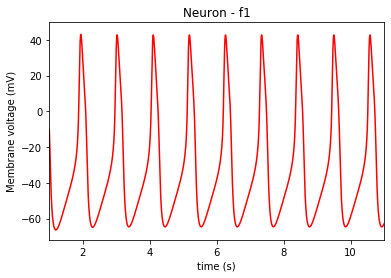

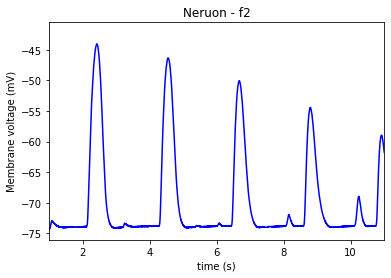

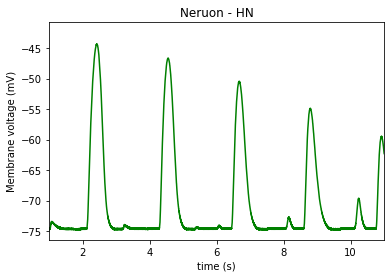

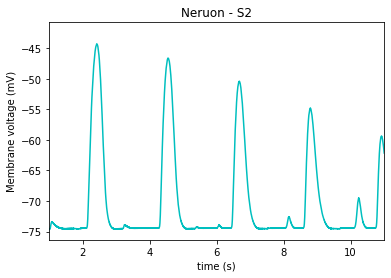

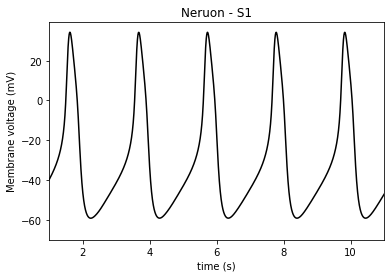

In [40]:
for i,Vm in enumerate(Vm_all):
    plt.figure(i)
    if i==0:
        plt.plot(t,Vm,color='r')
        plt.title('Neuron - f1')
    elif i==1:
        plt.title('Neruon - f2')
        plt.plot(t,Vm,color='b')
    elif i==2:
        plt.title('Neruon - HN')
        plt.plot(t,Vm,color='g')
    elif i==3:
        plt.title('Neruon - S2')
        plt.plot(t,Vm,color='c')
    elif i==4:
        plt.title('Neruon - S1')
        plt.plot(t,Vm,color='k')
    plt.xlabel('time (s)')
    plt.ylabel('Membrane voltage (mV)')
    plt.xlim(1,11)
            
plt.show()